# I] Import and options


In [1]:
import pandas, numpy, seaborn, scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [4]:
path = output_file_directory + "ATG7/MEF_HuH7/Seahorse_results/"

# II] DL data

## A) Extracellular Acidification Rate 

In [5]:
%%time
file_names = "ecar_final_exp1_", "ecar_final_exp2_", "ecar_final_exp3_"
all_conditions = "dmso", "baf"

ecar_exps = []
#for DMSO and BAF
for condition in all_conditions:
    #For experiment 1, 2 and 3
    for file_name in file_names: 
        #download data
        path2 = f'/seahorse_ECAR/dataframes_for_input/{file_name}{condition}.csv'
        df_ori = pandas.read_csv(path+path2, sep = ",")
        print(df_ori.iloc[:2,5:])

        ecar_exps.append(df_ori)

len(ecar_exps)

         info  drug   exp
0  glycolysis  dmso  exp1
1  glycolysis  dmso  exp1
         info  drug   exp
0  glycolysis  dmso  exp2
1  glycolysis  dmso  exp2
         info  drug   exp
0  glycolysis  dmso  exp3
1  glycolysis  dmso  exp3
         info drug   exp
0  glycolysis  baf  exp1
1  glycolysis  baf  exp1
         info drug   exp
0  glycolysis  baf  exp2
1  glycolysis  baf  exp2
         info drug   exp
0  glycolysis  baf  exp3
1  glycolysis  baf  exp3
Wall time: 38.3 ms


6

In [6]:
ecar_exps_subst = []
for df in ecar_exps:
    mean_neg_EV = df.loc[6:8,'Empty Vector -dox'].mean()
    mean_neg_EVd = df.loc[6:8,'Empty Vector +dox'].mean()
    mean_neg_iso1 = df.loc[6:8,'ATG7(1)'].mean()
    mean_neg_iso2 = df.loc[6:8,'ATG7(2)'].mean()

    df= df.assign(EV_noD = (df['Empty Vector -dox'] - mean_neg_EV),
                  EVd = (df['Empty Vector +dox'] - mean_neg_EVd),
                  ATG7_1 = (df['ATG7(1)'] - mean_neg_iso1),
                  ATG7_2 = (df['ATG7(2)'] - mean_neg_iso2)) 

    #select columns and don't take the negative controls
    cols = ['Time', 'EV_noD', 'EVd', 'ATG7_1', 'ATG7_2', 'info', 'drug', 'exp']
    df= df.loc[0:5, cols]
    ecar_exps_subst.append(df)
    
df

,Time,EV_noD,EVd,ATG7_1,ATG7_2,info,drug,exp
0,40.102374,0.704582,0.694421,0.990007,0.480623,glycolysis,baf,exp3
1,46.546482,1.057699,1.211769,1.232619,0.779844,glycolysis,baf,exp3
2,53.000464,1.291994,1.469659,1.432075,0.974741,glycolysis,baf,exp3
3,59.533737,3.321771,3.921083,4.170253,2.351342,max_glycolysis,baf,exp3
4,65.984421,3.361804,4.350832,4.629529,2.862281,max_glycolysis,baf,exp3
5,72.436794,3.956374,5.113028,5.027904,3.305405,max_glycolysis,baf,exp3


In [7]:
len(ecar_exps_subst)

6

In [12]:
steps = 'glycolysis', 'max_glycolysis'

ecar_exps_norm = pandas.DataFrame()
for df in ecar_exps_subst:
    for step in steps:
        data = df.loc[df['info'] == step]
        
        #normalize on EV
        norm_df = data.assign(EV_dox_ctl= data['EVd']/ data['EV_noD'],
                              EV_norm= data['EVd']/ data['EVd'],
                              ATG7_1norm= data['ATG7_1']/ data['EVd'],
                              ATG7_2norm= data['ATG7_2']/ data['EVd'])
        norm_df.reset_index(drop = True, inplace = True)
        
        #have mean instead of 3 values
        mean_df = pandas.DataFrame()
        mean_df['EV_dox_ctl'] = norm_df['EV_dox_ctl'].mean(),
        mean_df['EV'] = norm_df['EV_norm'].mean(),
        mean_df['ATG7_1'] = norm_df['ATG7_1norm'].mean(),
        mean_df['ATG7_2'] = norm_df['ATG7_2norm'].mean()
        mean_df['info'] = norm_df['info'][0]
        mean_df['drug'] = norm_df['drug'][0]
        mean_df['exp'] = norm_df['exp'][0]
        
        #put each experiment in the same df
        ecar_exps_norm = pandas.concat([ecar_exps_norm, mean_df], axis=0)
ecar_exps_norm

,EV_dox_ctl,EV,ATG7_1,ATG7_2,info,drug,exp
0,1.981001,1.0,1.657361,1.166955,glycolysis,dmso,exp1
0,1.675934,1.0,1.592489,1.529822,max_glycolysis,dmso,exp1
0,1.181054,1.0,1.757133,1.164202,glycolysis,dmso,exp2
0,1.546243,1.0,1.510545,1.046328,max_glycolysis,dmso,exp2
0,3.397361,1.0,0.624570,0.493366,glycolysis,dmso,exp3
0,5.155511,1.0,1.375141,0.736832,max_glycolysis,dmso,exp3
0,1.045433,1.0,1.161724,0.736798,glycolysis,baf,exp1
0,1.063404,1.0,1.171387,0.655567,max_glycolysis,baf,exp1
0,1.027943,1.0,0.971094,0.575548,glycolysis,baf,exp2
0,0.987269,1.0,0.947229,0.568288,max_glycolysis,baf,exp2


### 1) Statistic

In [14]:
data2

,EV_dox_ctl,EV,ATG7_1,ATG7_2,info,drug,exp
0,1.063404,1.0,1.171387,0.655567,max_glycolysis,baf,exp1
0,0.987269,1.0,0.947229,0.568288,max_glycolysis,baf,exp2
0,1.255656,1.0,1.036985,0.634668,max_glycolysis,baf,exp3


In [20]:
steps = 'glycolysis', 'max_glycolysis'
conditions = 'dmso', 'baf'

for step in steps:
    data = ecar_exps_norm.loc[ecar_exps_norm['info'] == step]
    print(step.upper())
    
    for condition in conditions:
        print(condition.upper())
        data2 = data.loc[data['drug'] == condition]
        print(data2, '\n')
        # Mann-Whitney analysis
        #controls
        statistic, pvalue = scipy.stats.mannwhitneyu(data2['EV'], data2['EV_dox_ctl'])
        Pvalue = "{:.3E}".format(pvalue)
        print(f'pvalue no dox vs dox is {Pvalue}')

        #isoform1 vs ev
        statistic, pvalue = scipy.stats.mannwhitneyu(data2['ATG7_1'], data2['EV'])
        Pvalue = "{:.3E}".format(pvalue)
        print(f'pvalue ATG7(1) vs dox is {Pvalue}')    

        #isoform2 vs ev
        statistic, pvalue = scipy.stats.mannwhitneyu(data2['ATG7_2'], data2['EV'])
        Pvalue = "{:.3E}".format(pvalue)
        print(f'pvalue ATG7(2) vs dox is {Pvalue}')    

        #isoforms
        statistic, pvalue = scipy.stats.mannwhitneyu(data2['ATG7_1'], data2['ATG7_2'])
        Pvalue = "{:.3E}".format(pvalue)
        print(f'pvalue: ATG7(1) vs ATG7(2) is {Pvalue}\n')

GLYCOLYSIS
DMSO
   EV_dox_ctl   EV    ATG7_1    ATG7_2        info  drug   exp
0    1.981001  1.0  1.657361  1.166955  glycolysis  dmso  exp1
0    1.181054  1.0  1.757133  1.164202  glycolysis  dmso  exp2
0    3.397361  1.0  0.624570  0.493366  glycolysis  dmso  exp3 

pvalue no dox vs dox is 6.360E-02
pvalue ATG7(1) vs dox is 6.428E-01
pvalue ATG7(2) vs dox is 6.428E-01
pvalue: ATG7(1) vs ATG7(2) is 4.000E-01

BAF
   EV_dox_ctl   EV    ATG7_1    ATG7_2        info drug   exp
0    1.045433  1.0  1.161724  0.736798  glycolysis  baf  exp1
0    1.027943  1.0  0.971094  0.575548  glycolysis  baf  exp2
0    1.089585  1.0  1.139097  0.666308  glycolysis  baf  exp3 

pvalue no dox vs dox is 6.360E-02
pvalue ATG7(1) vs dox is 6.428E-01
pvalue ATG7(2) vs dox is 6.360E-02
pvalue: ATG7(1) vs ATG7(2) is 1.000E-01

MAX_GLYCOLYSIS
DMSO
   EV_dox_ctl   EV    ATG7_1    ATG7_2            info  drug   exp
0    1.675934  1.0  1.592489  1.529822  max_glycolysis  dmso  exp1
0    1.546243  1.0  1.510545  1.

### 2) Graph for controls

In [21]:
ecar_dmso_glyco = ecar_exps_norm.loc[(ecar_exps_norm['info'] == 'glycolysis') & (ecar_exps_norm['drug'] == 'dmso')]
ecar_baf_glyco = ecar_exps_norm.loc[(ecar_exps_norm['info'] == 'glycolysis') & (ecar_exps_norm['drug'] == 'baf')]
ecar_dmso_max = ecar_exps_norm.loc[(ecar_exps_norm['info'] == 'max_glycolysis') & (ecar_exps_norm['drug'] == 'dmso')]
ecar_baf_max = ecar_exps_norm.loc[(ecar_exps_norm['info'] == 'max_glycolysis') & (ecar_exps_norm['drug'] == 'baf')]

C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


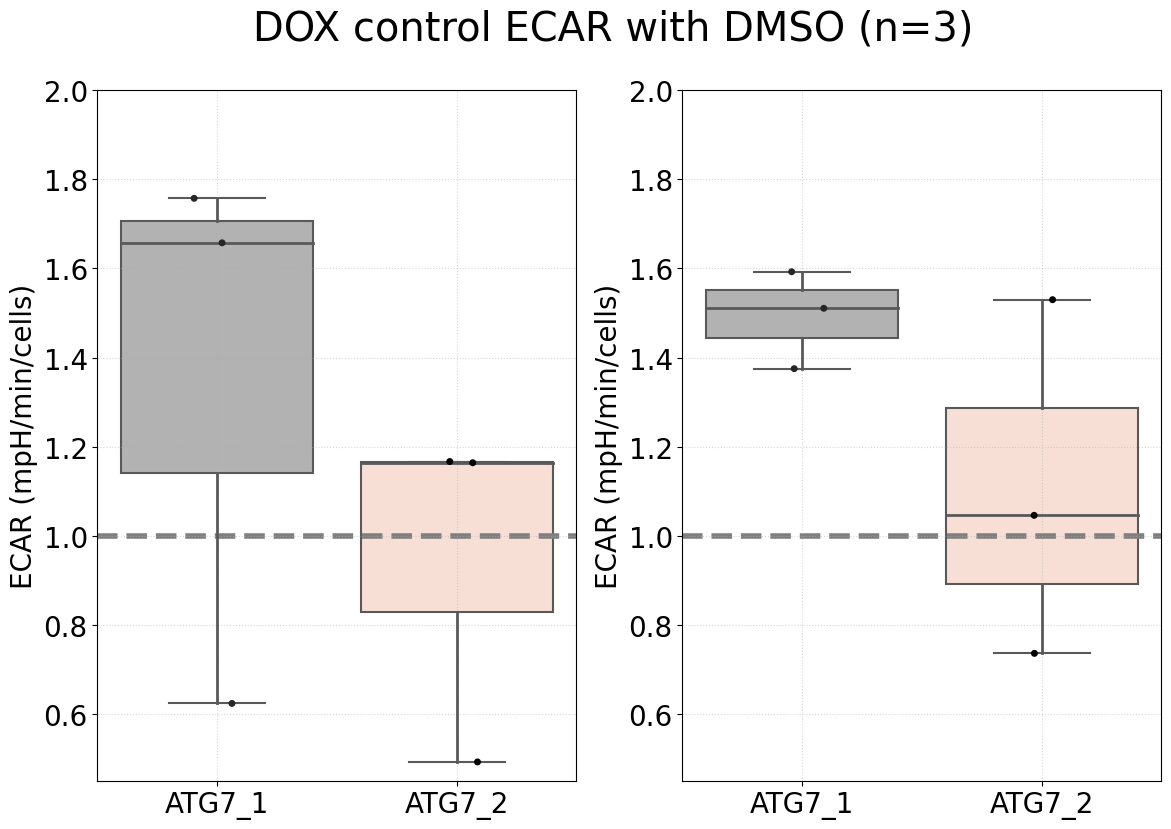

C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


<Figure size 1200x800 with 0 Axes>

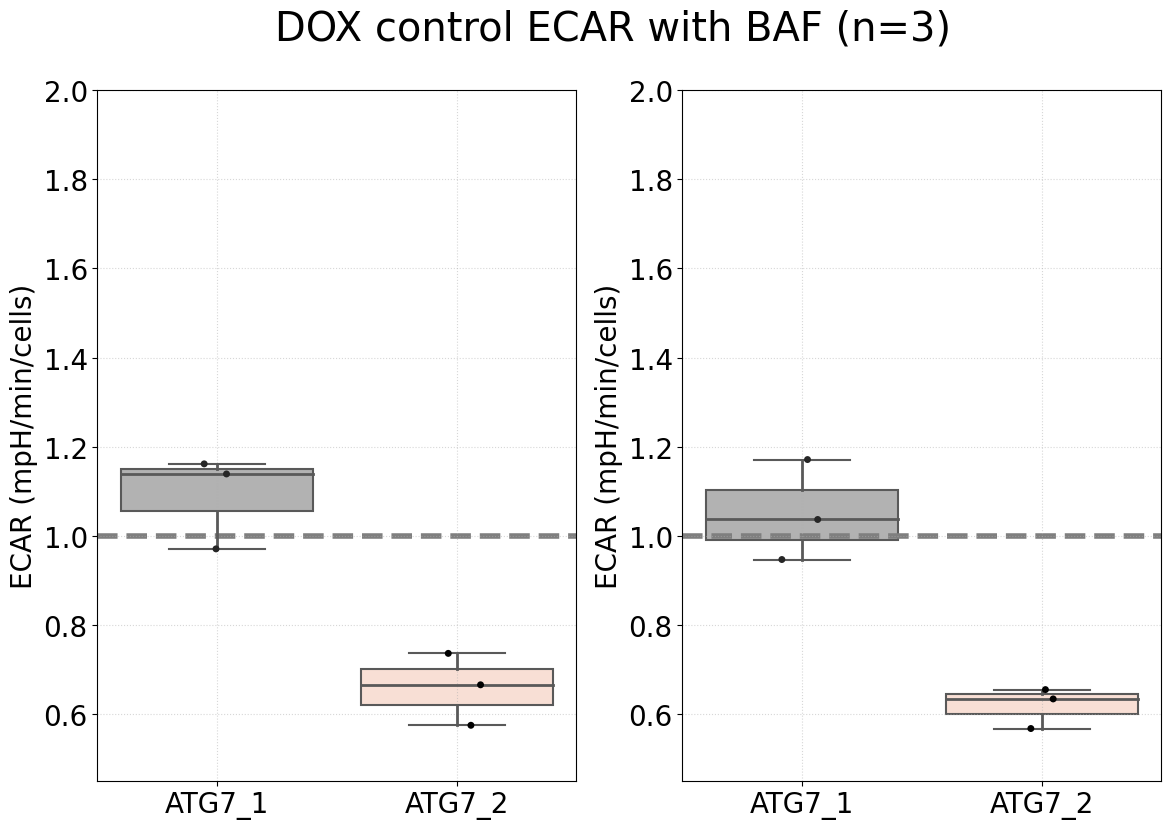

<Figure size 1200x800 with 0 Axes>

In [24]:
# BASAL LEVEL RATE
dfs_glyc = ecar_dmso_glyco, ecar_baf_glyco
dfs_max = ecar_dmso_max, ecar_baf_max
infos = 'DMSO', 'BAF'

for i in range(len(dfs_glyc)):
    df_glyco = dfs_glyc[i]
    df_max = dfs_max[i]
    info = infos[i]

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2)
    plt.tight_layout()
    fig.suptitle(f'DOX control ECAR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for DMSO
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df_glyco.iloc[:,2:4], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df_glyco.iloc[:,2:4], color = 'k')
    
    fig.set_xlabel('')
    fig.set_ylabel('ECAR (mpH/min/cells)')

    # Select which box you want to change    
    box_nodox = fig.patches[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))
    
    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2)


    #graph for BAF
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df_max.iloc[:,2:4], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df_max.iloc[:,2:4], color = 'k')
    
    fig.set_xlabel('')
    fig.set_ylabel('ECAR (mpH/min/cells)')

    # Select which box you want to change    
    box_nodox = fig.patches[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))
        
    fig.grid(alpha = 0.5, ls = ":")
#     fig.set_ylim(0.45,1.75)

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2)
                
    # save
    path2 = 'seahorse_ECAR/'
    text_file = 'graph_all_ecar_final_'+info
#     plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

### 3) Graph for isoforms

In [ ]:
ecar_dmso_glyco

C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)


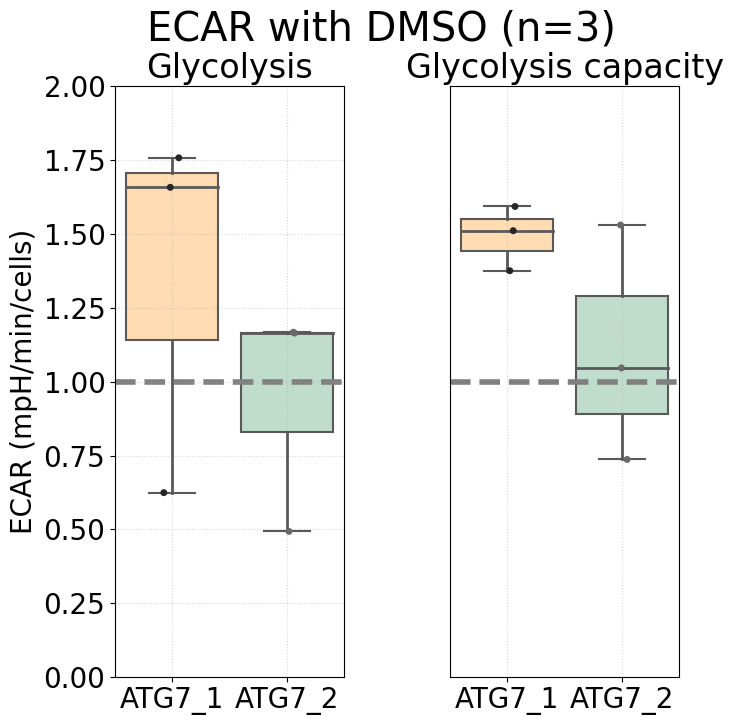

C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)


<Figure size 1200x800 with 0 Axes>

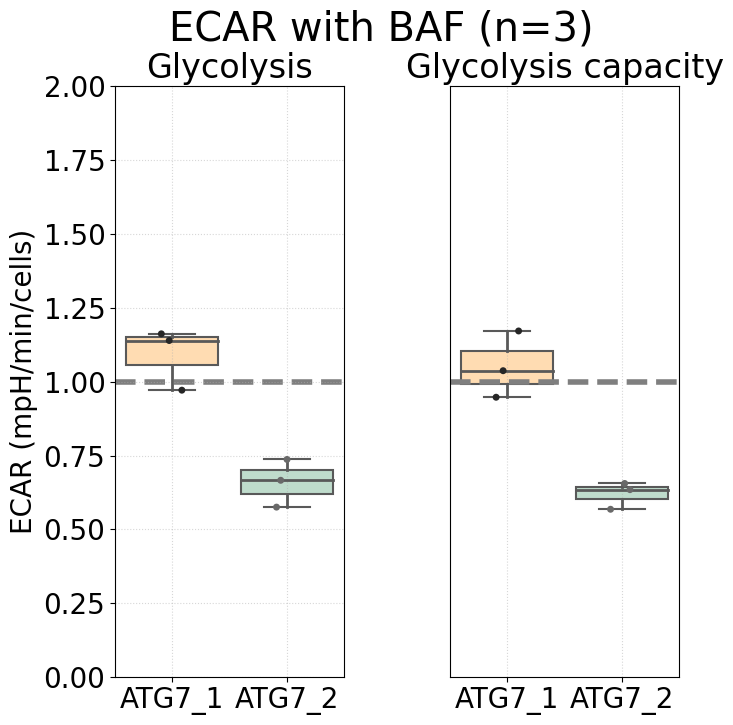

<Figure size 1200x800 with 0 Axes>

In [26]:
# BASAL LEVEL RATE
dfs_glyc = ecar_dmso_glyco, ecar_baf_glyco
dfs_max = ecar_dmso_max, ecar_baf_max
infos = 'DMSO', 'BAF'

for i in range(len(dfs_glyc)):
    df_glyco = dfs_glyc[i][['ATG7_1', 'ATG7_2']]
    df_max = dfs_max[i][['ATG7_1', 'ATG7_2']]
    info = infos[i]
    
    
    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2, figsize=(7, 7))
    plt.tight_layout()
    fig.suptitle(f'ECAR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for GLYCOLYSIS
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df_glyco, medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df_glyco, color = 'dimgray')
    
    fig.set_title('Glycolysis')
    fig.set_xlabel('')
    fig.set_ylabel('ECAR (mpH/min/cells)')

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0,2)


    #graph for MAXIMUM CAPACITY
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df_max, medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df_max, color = 'dimgray')
   
    fig.set_title('Glycolysis capacity')
    fig.set_xlabel('')
    fig.set_ylabel('')
    fig.set_yticks([])

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0,2)
                
    # save
    path2 = 'seahorse_ECAR/'
    text_file = 'graph_all_ecar_final_'+info
#     plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

In [ ]:
recap_ecar_dmso_glyco
recap_ecar_dmso_max_glyco
recap_ecar_dmso_negativ

In [ ]:
recap_ecar_dmso_negativ

In [ ]:
recap_ecar_dmso_negativ[['ATG7(1)', 'ATG7(2)']]

In [ ]:
tst = recap_ecar_dmso_max_glyco[['ATG7(1)', 'ATG7(2)']]
tst = tst - 


In [ ]:
# BASAL LEVEL RATE
dfs_glyc = recap_ecar_dmso_glyco, recap_ecar_baf_glyco
dfs_max = recap_ecar_dmso_max_glyco, recap_ecar_baf_max_glyco
dfs_negative = recap_ecar_dmso_negativ, recap_ecar_baf_negativ
infos = 'DMSO', 'BAF'

for i in range(len(dfs_glyc)):
    df_glyco = dfs_glyc[i]
    df_max = dfs_max[i]
    df_neg = dfs_negative[i]
    info = infos[i]

    tst = df_glyco[[iso1]] - df_neg[iso1]

In [ ]:
tst = recap_ecar_dmso_max_glyco[]

In [ ]:
# BASAL LEVEL RATE
dfs_glyc = recap_ecar_dmso_glyco, recap_ecar_baf_glyco
dfs_max = recap_ecar_dmso_max_glyco, recap_ecar_baf_max_glyco
infos = 'DMSO', 'BAF'

controls = 'MEF dox control'
iso1 = 'ATG7(1)'
iso2 = 'ATG7(2)'

for i in range(len(dfs_glyc)):
    df_glyco = dfs_glyc[i]
    df_max = dfs_max[i]
    info = infos[i]

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2, figsize=(7, 7))
    plt.tight_layout()
    fig.suptitle(f'ECAR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for GLYCOLYSIS
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df_glyco.iloc[:,2:4], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df_glyco.iloc[:,2:4], color = 'dimgray')
    
    fig.set_title('Glycolysis')
    fig.set_xlabel('')
    fig.set_ylabel('ECAR (mpH/min/cells)')

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,1.75)


    #graph for MAXIMUM CAPACITY
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df_max.iloc[:,2:4], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df_max.iloc[:,2:4], color = 'dimgray')
   
    fig.set_title('Glycolysis capacity')
    fig.set_xlabel('')
    fig.set_ylabel('')
    fig.set_yticks([])

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,1.75)
                
    # save
    path2 = 'seahorse_ECAR/'
    text_file = 'graph_all_ecar_final_'+info
#     plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

#### Glycolysis (relative to shCtrl-expressing cells) was calculated as “average ECAR following glucose addition minus average ECAR following inhibition of glycolysis using 2-DG.” Relative mitochondrial respiration was calculated as “basal OCR minus OCR following antimycin and rotenone (ETC inhibitors) treatment

## B) Oxygen Consumption Rate 

In [ ]:
%%time
file_names = "ocr_exp2_df_", "ocr_exp7_df_", "ocr_exp12_df_", "ocr_exp13_df_"
all_conditions = "dmso", "baf"
lvl_studied = '_basal', '_maximum'

ocr_exps = []
#for basal and maximum
for level in lvl_studied:
    #for DMSO and BAF
    for condition in all_conditions:
        #For experiment 1, 2 and 3
        for file_name in file_names: 
            #download data
            path2 = f'seahorse_OCR/dataframes_for_input/{file_name}{condition}{level}.csv'
            df_ori = pandas.read_csv(path+path2, sep = ",")
            #create normalized columns and rename
            df = df_ori.assign(EV_dox_ctl= df_ori['Empty Vector +dox']/ df_ori['Empty Vector -dox'],
                               ATG7_1norm= df_ori['ATG7(1)']/ df_ori['Empty Vector +dox'],
                               ATG7_2norm= df_ori['ATG7(2)']/ df_ori['Empty Vector +dox'])
            df['exp'] = file_name.split('_')[1]
            df['condition'] = condition
            df['level studied'] = level.split('_')[1]
            df = df.iloc[:,5:] #select the 3 normalized columns
            df = df.rename(columns = {'EV_dox_ctl' : 'MEF dox control', 
                                      'ATG7_1norm' : 'ATG7(1)',
                                      'ATG7_2norm' : 'ATG7(2)'})
            ocr_exps.append(df)

#basal level in experiment 12 is not good. Not stable, go down. I remove it
recap_ocr_dmso_basal = pandas.concat([ocr_exps[0], ocr_exps[1], ocr_exps[3]], axis=0)
recap_ocr_baf_basal = pandas.concat([ocr_exps[4], ocr_exps[5], ocr_exps[7]], axis=0)
recap_ocr_dmso_max = pandas.concat([ocr_exps[8], ocr_exps[9], ocr_exps[10], ocr_exps[11]], axis=0)
recap_ocr_baf_max = pandas.concat([ocr_exps[12], ocr_exps[13], ocr_exps[14], ocr_exps[15]], axis=0)

print(recap_ocr_dmso_basal, '\n', recap_ocr_baf_basal)

### 1) Basal level rate

In [ ]:
# BASAL LEVEL RATE
dfs = recap_ocr_dmso_basal, recap_ocr_baf_basal
infos = 'DMSO', 'BAF'

controls = 'MEF dox control'
iso1 = 'ATG7(1)'
iso2 = 'ATG7(2)'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]

    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(df_ori['Empty Vector +dox'], df_ori['Empty Vector -dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between no dox and dox with {info} is {Pvalue} for basal level rate')    

    #isoforms
    statistic, pvalue = scipy.stats.mannwhitneyu(df[iso1], df[iso2])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between ATG7(1) and ATG7(2) with, {info} is {Pvalue}')

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2)
    plt.tight_layout()
    fig.suptitle(f'Basal OCR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for controls
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df.iloc[:,0:1], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df.iloc[:,0:1], color = 'k')
    
    fig.set_xlabel('')
    fig.set_ylabel('Basal oxygene consumption rate')

    # Select which box you want to change    
    box_nodox = fig.patches[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)


    #graph for ATG7(1) vs ATG7(2)
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df.iloc[:,1:], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df.iloc[:,1:], color = 'k')
   
    fig.set_xlabel('')
    fig.set_ylabel('Basal oxygene consumption rate')

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)
                
    # save
    path2 = 'seahorse_OCR/'
    text_file = 'graph_all_ocr_basal_'+info
    plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

### 2) Maximal level rate

In [ ]:
# BASAL LEVEL RATE
dfs = recap_ocr_dmso_max, recap_ocr_baf_max
infos = 'DMSO', 'BAF'

controls = 'MEF dox control'
iso1 = 'ATG7(1)'
iso2 = 'ATG7(2)'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]

    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(df_ori['Empty Vector +dox'], df_ori['Empty Vector -dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between no dox and dox with {info} is {Pvalue} for basal level rate')    

    #isoforms
    statistic, pvalue = scipy.stats.mannwhitneyu(df[iso1], df[iso2])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between ATG7(1) and ATG7(2) with, {info} is {Pvalue}')

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2)
    plt.tight_layout()
    fig.suptitle(f'Maximum OCR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for controls
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df.iloc[:,0:1], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df.iloc[:,0:1], color = 'k')
    
    fig.set_xlabel('')
    fig.set_ylabel('Maximum oxygen consumption rate')

    # Select which box you want to change    
    box_nodox = fig.patches[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)


    #graph for ATG7(1) vs ATG7(2)
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df.iloc[:,1:], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df.iloc[:,1:], color = 'k')
   
    fig.set_xlabel('')
    fig.set_ylabel('Maximum oxygen consumption rate')

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)
                
    # save
    path2 = 'seahorse_OCR/'
    text_file = 'graph_all_ocr_maximum_'+info
    plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()